In [272]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SMOTENC
import imblearn

plt.style.use("seaborn-v0_8")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
rta_df = pd.read_csv("/mnt/dl/machine_learning_dataset/road_traffic_accidents/rta_dataset.csv")

In [3]:
rta_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [4]:
rta_df["Accident_severity"].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [5]:
rta_clean_df = pd.read_csv("/mnt/dl/machine_learning_dataset/road_traffic_accidents/cleaned.csv")

In [6]:
rta_clean_df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


In [7]:
rta_clean_df["Accident_severity"].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [8]:
pd.Index(rta_df.columns).difference(pd.Index(rta_clean_df.columns))

Index(['Age_band_of_casualty', 'Area_accident_occured', 'Casualty_class',
       'Casualty_severity', 'Day_of_week', 'Defect_of_vehicle',
       'Fitness_of_casuality', 'Number_of_casualties',
       'Number_of_vehicles_involved', 'Owner_of_vehicle', 'Road_allignment',
       'Road_surface_conditions', 'Service_year_of_vehicle', 'Sex_of_casualty',
       'Time', 'Type_of_vehicle', 'Work_of_casuality'],
      dtype='object')

In [9]:
pd.Index(rta_df.columns).intersection(pd.Index(rta_clean_df.columns))

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [10]:
rta_clean_df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [11]:
pd.Index(rta_clean_df.columns).difference(pd.Index(rta_df.columns))

Index([], dtype='object')

In [12]:
rta_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [13]:
acc_times = rta_df["Time"].str.split(":").map(lambda x: int(x[0]))
acc_times

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: Time, Length: 12316, dtype: int64

In [14]:
acc_times_count = acc_times.value_counts().sort_index()
acc_times_count

Time
0      206
1      134
2       84
3       84
4       91
5       76
6      214
7      532
8      828
9      559
10     500
11     603
12     691
13     772
14     639
15     874
16     921
17    1228
18     956
19     708
20     604
21     401
22     402
23     209
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of accident depending on the hours')

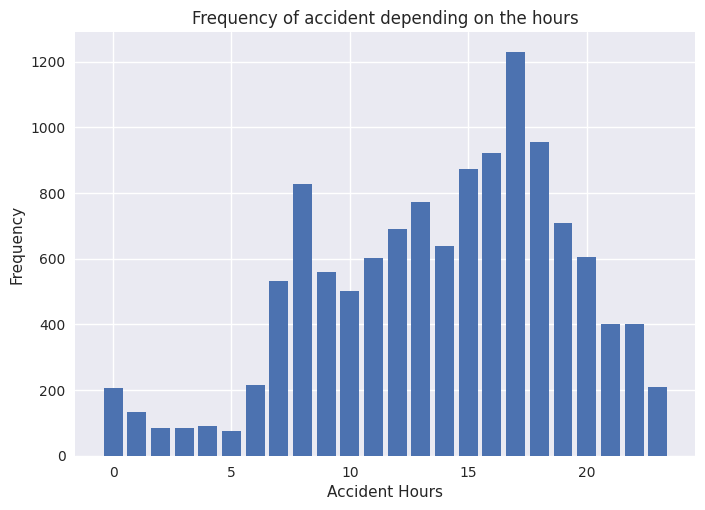

In [15]:
fig, ax = plt.subplots()
ax.bar(acc_times_count.index, acc_times_count.values, align="center")
ax.set_xlabel("Accident Hours")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of accident depending on the hours")

In [16]:
day_week_names = [ 'Monday',  'Tuesday', 'Wednesday', 'Thursday', 'Friday',  'Saturday', 'Sunday']
day_week_acc = rta_df["Day_of_week"].value_counts().loc[day_week_names]
day_week_acc

Day_of_week
Monday       1681
Tuesday      1770
Wednesday    1840
Thursday     1851
Friday       2041
Saturday     1666
Sunday       1467
Name: count, dtype: int64

[Text(0.5, 1.0, 'Frequency by day of week'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Frequency')]

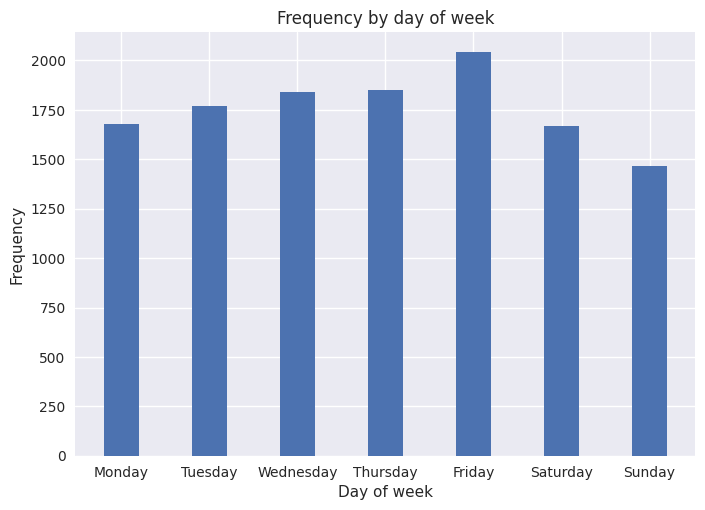

In [17]:
fig, ax = plt.subplots()
ax.bar(day_week_acc.index, day_week_acc.values, width=.4)
ax.set(title="Frequency by day of week", xlabel="Day of week", ylabel="Frequency")

In [18]:
rta_df["Age_band_of_driver"].value_counts()
# Delete the columns. Check later

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [19]:
rta_df["Sex_of_driver"].value_counts()
# Delete the columns

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

In [20]:
rta_df["Educational_level"].value_counts()
# Delete the columns. Check later

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [21]:
rta_df["Vehicle_driver_relation"].value_counts()
# Delete the columns

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

In [22]:
rta_df["Driving_experience"].value_counts()
# Delete the columns. Check later

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

In [23]:
rta_df["Type_of_vehicle"].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

/tmp/ipykernel_15495/2451526724.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Automobile'),
 Text(1, 0, 'Lorry (41?100Q)'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Pick up upto 10Q'),
 Text(4, 0, 'Public (12 seats)'),
 Text(5, 0, 'Stationwagen'),
 Text(6, 0, 'Lorry (11?40Q)'),
 Text(7, 0, 'Public (13?45 seats)'),
 Text(8, 0, 'Public (> 45 seats)'),
 Text(9, 0, 'Long lorry'),
 Text(10, 0, 'Taxi'),
 Text(11, 0, 'Motorcycle'),
 Text(12, 0, 'Special vehicle'),
 Text(13, 0, 'Ridden horse'),
 Text(14, 0, 'Turbo'),
 Text(15, 0, 'Bajaj'),
 Text(16, 0, 'Bicycle')]

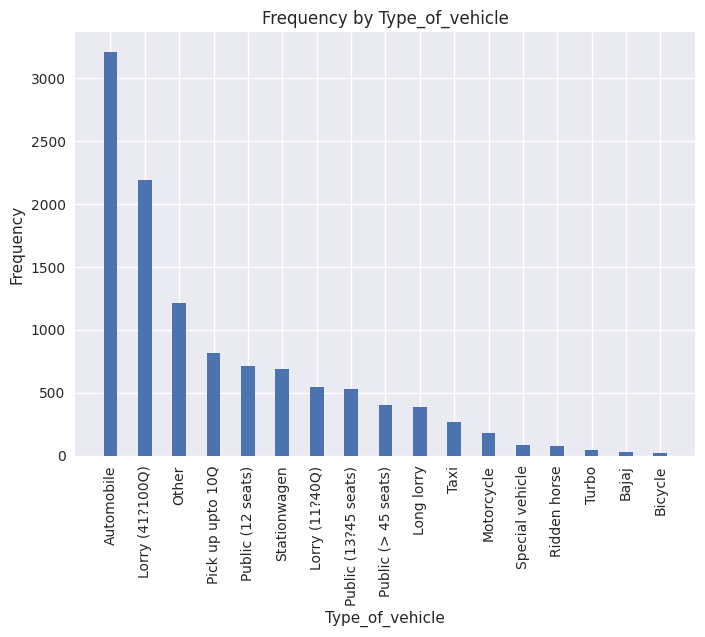

In [24]:
fig, ax = plt.subplots()
sr = rta_df["Type_of_vehicle"].value_counts()
ax.bar(sr.index, sr.values, width=.4)
ax.set(title="Frequency by Type_of_vehicle", xlabel="Type_of_vehicle", ylabel="Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [25]:
rta_df["Owner_of_vehicle"].value_counts()
# delete

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

In [26]:
rta_df["Service_year_of_vehicle"].value_counts()
# delete columns

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [27]:
rta_df["Defect_of_vehicle"].value_counts()
# delete

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64

In [28]:
rta_df["Area_accident_occured"].value_counts()
#delete. Check later

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [29]:
rta_df['Lanes_or_Medians'].value_counts()
# delete. Check later

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

In [30]:
rta_df['Road_allignment'].value_counts()
# Check Later

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

In [31]:
rta_df["Types_of_Junction"].value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [32]:
rta_df['Road_surface_type'].value_counts()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

In [33]:
rta_df['Road_surface_conditions'].value_counts()

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

In [34]:
rta_df['Light_conditions'].value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64

In [35]:
rta_df['Weather_conditions'].value_counts()
#delete. keep

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [36]:
rta_df['Type_of_collision'].value_counts()
# delete. keep

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [37]:
rta_df['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

In [38]:
rta_df['Number_of_casualties'].value_counts()
# delete

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

In [39]:
rta_df['Vehicle_movement'].value_counts()
# delete. keep

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [40]:
rta_df['Casualty_class'].value_counts()
# delete. 

Casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

In [41]:
rta_df['Sex_of_casualty'].value_counts()
# delete

Sex_of_casualty
Male      5253
na        4443
Female    2620
Name: count, dtype: int64

In [42]:
rta_df['Age_band_of_casualty'].value_counts()
#delete

Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

In [43]:
rta_df['Casualty_severity'].value_counts()

Casualty_severity
3     7076
na    4443
2      771
1       26
Name: count, dtype: int64

In [44]:
rta_df['Work_of_casuality'].value_counts()
#delete

Work_of_casuality
Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: count, dtype: int64

In [45]:
rta_df['Fitness_of_casuality'].value_counts()
#delete

Fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64

In [46]:
rta_df['Pedestrian_movement'].value_counts()
# delete. Check later

Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

In [47]:
rta_df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [48]:
rta_df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [49]:
df = rta_df.drop(columns=["Time", "Day_of_week", "Sex_of_driver", "Vehicle_driver_relation", "Owner_of_vehicle", "Service_year_of_vehicle", 
                           "Defect_of_vehicle",  "Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", 
                           "Casualty_severity", "Work_of_casuality", "Fitness_of_casuality", 
                           "Number_of_casualties" ])

In [50]:
df

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Above high school,1-2yr,Automobile,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Junior high school,2-5yr,NaN,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,NaN,2-5yr,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Elementary school,5-10yr,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Junior high school,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Junior high school,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [51]:
df.isna().sum()

Age_band_of_driver               0
Educational_level              741
Driving_experience             829
Type_of_vehicle                950
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Vehicle_movement               308
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [52]:
df["Road_allignment"].mode().item()

'Tangent road with flat terrain'

In [53]:
df.isna().any().index

Index(['Age_band_of_driver', 'Educational_level', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [54]:
df.isna().all()

Age_band_of_driver             False
Educational_level              False
Driving_experience             False
Type_of_vehicle                False
Area_accident_occured          False
Lanes_or_Medians               False
Road_allignment                False
Types_of_Junction              False
Road_surface_type              False
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision              False
Number_of_vehicles_involved    False
Vehicle_movement               False
Pedestrian_movement            False
Cause_of_accident              False
Accident_severity              False
dtype: bool

In [55]:
def impute(df, itype, **kwargs):
    df = df.copy()
    if itype == "mode":
        columns = df.isna().any()
        for k, flag in columns.items():
            if not flag:
                continue
            value = df[k].mode().item()
            df.loc[df[k].isna(), k] = value 
    elif itype == "knn":
        knn_imp = KNNImputer(**kwargs)
        df = pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)
    else:
        raise NotImplementedError
    return df

In [56]:
df_inp_mode = impute(df, "mode")

In [57]:
df_inp_mode


,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Junior high school,2-5yr,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Junior high school,2-5yr,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Elementary school,5-10yr,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Junior high school,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Junior high school,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [58]:
df_inp_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Educational_level            12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Type_of_vehicle              12316 non-null  object
 4   Area_accident_occured        12316 non-null  object
 5   Lanes_or_Medians             12316 non-null  object
 6   Road_allignment              12316 non-null  object
 7   Types_of_Junction            12316 non-null  object
 8   Road_surface_type            12316 non-null  object
 9   Road_surface_conditions      12316 non-null  object
 10  Light_conditions             12316 non-null  object
 11  Weather_conditions           12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Number_of_vehicles_involved  12

In [59]:
s = df_inp_mode["Age_band_of_driver"].copy()

In [60]:
s

0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object

In [61]:
pd.Series(pd.Categorical(s))

0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Length: 12316, dtype: category
Categories (5, object): ['18-30', '31-50', 'Over 51', 'Under 18', 'Unknown']

In [62]:
s.astype("category").dtypes.categories

Index(['18-30', '31-50', 'Over 51', 'Under 18', 'Unknown'], dtype='object')

In [63]:
label_encoder = preprocessing.LabelEncoder()

In [64]:
df_inp_mode.apply(label_encoder.fit_transform)

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,0,0,0,9,2,5,1,0,0,3,2,3,1,2,5,9,2
1,1,4,3,11,6,4,5,1,0,0,3,2,8,1,2,5,16,2
2,0,4,0,5,1,6,5,1,0,0,3,2,2,1,2,5,0,1
3,0,4,2,11,6,6,6,7,2,0,0,2,8,1,2,5,1,2
4,0,4,1,0,4,6,5,7,0,0,0,2,8,1,2,5,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,4,1,4,5,4,5,1,0,0,3,2,8,1,2,5,10,2
12312,4,1,2,0,5,2,0,1,0,0,3,2,8,1,4,5,10,2
12313,2,4,2,1,5,2,7,1,0,0,3,2,8,0,4,5,1,1
12314,0,4,3,5,6,4,7,1,0,0,0,2,8,1,4,5,5,2


In [65]:
label_encoder.classes_

array(['Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

In [66]:
df_inp_mode

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Junior high school,2-5yr,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Junior high school,2-5yr,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Elementary school,5-10yr,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Junior high school,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Junior high school,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [67]:
preprocessing.OneHotEncoder().fit_transform(df_inp_mode).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [68]:
preprocessing.OrdinalEncoder().fit_transform(df_inp_mode)

array([[ 0.,  0.,  0., ...,  5.,  9.,  2.],
       [ 1.,  4.,  3., ...,  5., 16.,  2.],
       [ 0.,  4.,  0., ...,  5.,  0.,  1.],
       ...,
       [ 2.,  4.,  2., ...,  5.,  1.,  1.],
       [ 0.,  4.,  3., ...,  5.,  5.,  2.],
       [ 0.,  4.,  2., ...,  1.,  1.,  2.]])

In [69]:
pd.DataFrame(preprocessing.OrdinalEncoder().fit(df_inp_mode).inverse_transform(preprocessing.OrdinalEncoder().fit_transform(df_inp_mode)),
             columns=df_inp_mode.columns)

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Junior high school,2-5yr,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Junior high school,2-5yr,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Elementary school,5-10yr,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Junior high school,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Junior high school,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [70]:
ordinal_encoder = preprocessing.OrdinalEncoder()

In [71]:
ordinal_encoder.fit(df_inp_mode)

OrdinalEncoder()

In [72]:
df_inp_mode

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Junior high school,2-5yr,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Junior high school,2-5yr,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Elementary school,5-10yr,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Junior high school,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Junior high school,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [73]:
mdf = ordinal_encoder.fit_transform(df_inp_mode)

In [74]:
mdf

array([[ 0.,  0.,  0., ...,  5.,  9.,  2.],
       [ 1.,  4.,  3., ...,  5., 16.,  2.],
       [ 0.,  4.,  0., ...,  5.,  0.,  1.],
       ...,
       [ 2.,  4.,  2., ...,  5.,  1.,  1.],
       [ 0.,  4.,  3., ...,  5.,  5.,  2.],
       [ 0.,  4.,  2., ...,  1.,  1.,  2.]])

In [75]:
mdf = pd.DataFrame(mdf, columns=df_inp_mode.columns)
mdf

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0.0,0.0,0.0,0.0,9.0,2.0,5.0,1.0,0.0,0.0,3.0,2.0,3.0,1.0,2.0,5.0,9.0,2.0
1,1.0,4.0,3.0,11.0,6.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,16.0,2.0
2,0.0,4.0,0.0,5.0,1.0,6.0,5.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,5.0,0.0,1.0
3,0.0,4.0,2.0,11.0,6.0,6.0,6.0,7.0,2.0,0.0,0.0,2.0,8.0,1.0,2.0,5.0,1.0,2.0
4,0.0,4.0,1.0,0.0,4.0,6.0,5.0,7.0,0.0,0.0,0.0,2.0,8.0,1.0,2.0,5.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1.0,4.0,1.0,4.0,5.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,10.0,2.0
12312,4.0,1.0,2.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,4.0,5.0,10.0,2.0
12313,2.0,4.0,2.0,1.0,5.0,2.0,7.0,1.0,0.0,0.0,3.0,2.0,8.0,0.0,4.0,5.0,1.0,1.0
12314,0.0,4.0,3.0,5.0,6.0,4.0,7.0,1.0,0.0,0.0,0.0,2.0,8.0,1.0,4.0,5.0,5.0,2.0


In [76]:
mdf.corr()

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
Age_band_of_driver,1.000000,0.013613,-0.013407,0.004830,0.011472,0.008176,0.000486,-0.028025,0.001058,-0.032533,-0.007766,0.025482,0.000496,0.001690,-0.006562,0.000372,-0.000703,0.013185
Educational_level,0.013613,1.000000,0.057625,0.005447,-0.006854,-0.002756,-0.010213,0.014798,0.014345,0.008614,-0.000290,-0.000242,-0.009477,0.012401,0.004248,0.000177,-0.000451,-0.001471
Driving_experience,-0.013407,0.057625,1.000000,0.014333,-0.000290,-0.010444,-0.015602,0.009245,0.020872,-0.003696,-0.015577,-0.000084,0.012574,-0.008222,0.004794,-0.018790,-0.007728,0.000509
Type_of_vehicle,0.004830,0.005447,0.014333,1.000000,-0.007631,-0.020156,-0.020910,-0.005553,0.013972,0.019018,-0.003739,0.006903,0.025911,0.001140,0.010841,0.010500,-0.004200,-0.003709
Area_accident_occured,0.011472,-0.006854,-0.000290,-0.007631,1.000000,0.022760,-0.025859,0.014580,-0.004275,-0.007290,-0.013597,0.003127,-0.003940,-0.016498,0.004691,0.000949,-0.009589,-0.018374
Lanes_or_Medians,0.008176,-0.002756,-0.010444,-0.020156,0.022760,1.000000,0.042815,-0.002125,-0.026511,0.011774,0.004624,0.005828,0.007008,-0.001199,-0.002089,0.005848,0.016384,-0.011844
Road_allignment,0.000486,-0.010213,-0.015602,-0.020910,-0.025859,0.042815,1.000000,0.007188,0.004413,-0.000918,0.005625,0.018304,0.020418,-0.001536,-0.004267,0.005219,-0.000287,-0.005967
Types_of_Junction,-0.028025,0.014798,0.009245,-0.005553,0.014580,-0.002125,0.007188,1.000000,0.008787,0.004724,0.037063,-0.001816,0.007516,-0.020214,-0.010761,-0.008855,-0.006561,-0.008861
Road_surface_type,0.001058,0.014345,0.020872,0.013972,-0.004275,-0.026511,0.004413,0.008787,1.000000,0.000629,-0.011965,0.003148,-0.024768,-0.002167,0.000382,-0.006762,-0.015085,-0.004510
Road_surface_conditions,-0.032533,0.008614,-0.003696,0.019018,-0.007290,0.011774,-0.000918,0.004724,0.000629,1.000000,-0.198447,0.400485,0.000456,-0.020963,-0.004667,0.006157,0.002811,0.004579


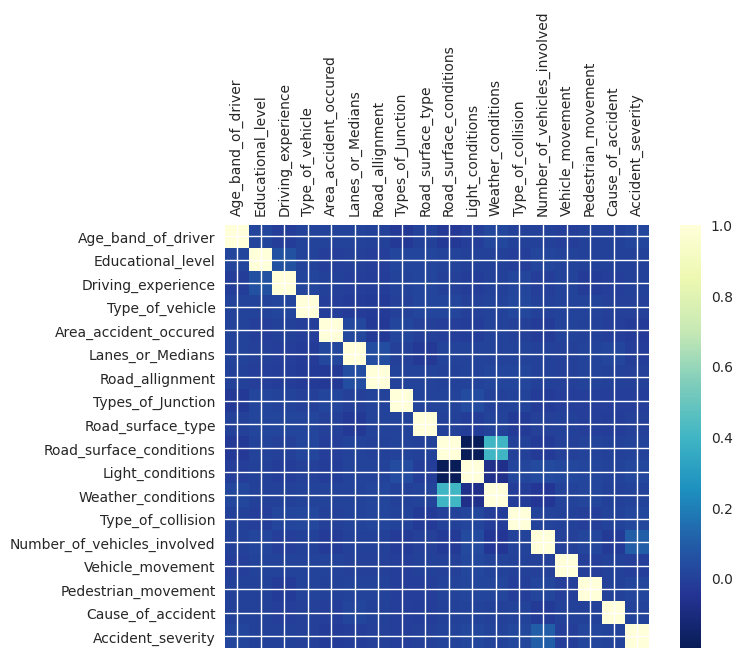

In [77]:
fig, ax = plt.subplots()
im = ax.imshow(mdf.corr(), cmap=plt.cm.YlGnBu_r, origin="upper")
fig.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(mdf.columns)), labels=mdf.columns, rotation=90)
ax.set_yticks(np.arange(len(mdf.columns)), labels=mdf.columns, rotation=0)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

In [78]:
def get_data(df):
    x = df.drop(columns=["Accident_severity"])
    y = df["Accident_severity"]
    xt, xv, yt, yv = train_test_split(x, y, test_size=0.4, stratify=y, random_state=0)
    print(xt.shape, xv.shape, yt.shape, yv.shape)
    # return ([s.astype(int).applymap(str).astype("category") for s in [xt, xv]] +  
    #        [s.astype(int).map(str).astype("category") for s in [yt, yv]])
    return ([s.astype(float) for s in [xt, xv]] +  
           [s.astype(int) for s in [yt, yv]])

In [79]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)

(7389, 17) (4927, 17) (7389,) (4927,)


In [80]:
xtrain["Age_band_of_driver"]

1679     1.0
5930     0.0
6075     0.0
4197     0.0
11233    2.0
        ... 
2151     0.0
11763    2.0
1407     0.0
12232    1.0
11486    0.0
Name: Age_band_of_driver, Length: 7389, dtype: float64

In [81]:
xtrain

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
1679,1.0,1.0,1.0,0.0,7.0,2.0,5.0,2.0,0.0,0.0,3.0,2.0,8.0,1.0,7.0,5.0,6.0
5930,0.0,4.0,2.0,9.0,7.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,9.0,5.0,3.0
6075,0.0,4.0,4.0,5.0,6.0,4.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,5.0,0.0
4197,0.0,4.0,2.0,4.0,7.0,2.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,3.0,5.0,3.0
11233,2.0,1.0,1.0,7.0,6.0,4.0,5.0,7.0,0.0,0.0,3.0,2.0,8.0,0.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0.0,1.0,2.0,0.0,4.0,2.0,5.0,0.0,2.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,10.0
11763,2.0,4.0,2.0,5.0,7.0,0.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,2.0,9.0,5.0,0.0
1407,0.0,4.0,0.0,11.0,9.0,6.0,5.0,1.0,0.0,0.0,2.0,2.0,8.0,0.0,7.0,5.0,1.0
12232,1.0,4.0,2.0,11.0,2.0,6.0,5.0,7.0,0.0,0.0,3.0,2.0,8.0,2.0,1.0,5.0,12.0


In [82]:
ytrain

1679     2
5930     2
6075     2
4197     2
11233    2
        ..
2151     2
11763    2
1407     2
12232    2
11486    2
Name: Accident_severity, Length: 7389, dtype: int64

In [83]:
pd.DataFrame(ytrain).value_counts()

Accident_severity
2                    6248
1                    1046
0                      95
Name: count, dtype: int64

In [84]:
pd.DataFrame(ytrain).value_counts()

Accident_severity
2                    6248
1                    1046
0                      95
Name: count, dtype: int64

In [85]:
xtrain.dtypes

Age_band_of_driver             float64
Educational_level              float64
Driving_experience             float64
Type_of_vehicle                float64
Area_accident_occured          float64
Lanes_or_Medians               float64
Road_allignment                float64
Types_of_Junction              float64
Road_surface_type              float64
Road_surface_conditions        float64
Light_conditions               float64
Weather_conditions             float64
Type_of_collision              float64
Number_of_vehicles_involved    float64
Vehicle_movement               float64
Pedestrian_movement            float64
Cause_of_accident              float64
dtype: object

In [86]:
smote = SMOTE()
xtrain_samp, ytrain_samp = smote.fit_resample(xtrain, ytrain)

In [87]:
xtrain_samp

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1.000000,1.000000,1.000000,0.00000,7.000000,2.000000,5.000000,2.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,7.00000,5.0,6.000000
1,0.000000,4.000000,2.000000,9.00000,7.000000,4.000000,5.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,9.00000,5.0,3.000000
2,0.000000,4.000000,4.000000,5.00000,6.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.00000,5.0,0.000000
3,0.000000,4.000000,2.000000,4.00000,7.000000,2.000000,5.000000,1.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,3.00000,5.0,3.000000
4,2.000000,1.000000,1.000000,7.00000,6.000000,4.000000,5.000000,7.000000,0.000000,0.000000,3.000000,2.000000,8.000000,0.000000,4.00000,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,1.753953,4.000000,2.246047,0.00000,8.261859,2.492094,0.753953,1.000000,0.000000,2.261859,3.000000,3.507906,0.753953,1.000000,2.00000,5.0,12.261859
18740,1.444915,4.000000,3.000000,0.00000,3.669490,1.444915,5.000000,7.000000,1.110170,1.665255,3.000000,3.110170,8.000000,0.444915,8.11017,5.0,10.000000
18741,0.000000,2.000000,0.783625,3.13450,9.000000,2.432750,5.000000,2.567250,0.000000,0.000000,0.000000,2.000000,1.783625,1.000000,2.00000,5.0,13.567250
18742,0.109110,3.781781,2.218219,7.10911,7.000000,1.890890,5.000000,0.890890,0.000000,0.000000,2.672671,2.000000,1.890890,0.109110,2.00000,5.0,0.000000


In [88]:
model = LogisticRegression(penalty="l2", C=1e9, solver="saga", max_iter=1000000, random_state=40)
min_max_scaler = preprocessing.MinMaxScaler((0, 1))
x, y = xtrain_samp, ytrain_samp

In [89]:
pipeline = sklearn.pipeline.Pipeline([
                                      ("min_max_scaler", min_max_scaler),
                                      ("model", model)
                                      ])

In [90]:
pipeline.fit(x, y)

Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=1000000000.0, max_iter=1000000,
                                    random_state=40, solver='saga'))])

In [91]:
ypred = model.predict(min_max_scaler.transform(xvalid))
# ypred = model.predict(xtrain)

In [92]:
ypred

array([2, 1, 1, ..., 2, 0, 1])

In [93]:
acc = pd.DataFrame(classification_report(yvalid, ypred, output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.019701,0.460317,0.037785,63.000000
1,0.158098,0.352941,0.218375,697.000000
2,0.864139,0.393808,0.541048,4167.000000
accuracy,0.388878,0.388878,0.388878,0.388878
macro avg,0.347313,0.402356,0.265736,4927.000000
weighted avg,0.753461,0.388878,0.488966,4927.000000


## Add KNN Imputer

In [94]:
ordinal_encoder = preprocessing.OrdinalEncoder()
df_inp_knn = pd.DataFrame(ordinal_encoder.fit_transform(df), columns=df.columns)

In [95]:
df_inp_knn

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0.0,0.0,0.0,0.0,9.0,NaN,5.0,1.0,0.0,0.0,3.0,2.0,3.0,1.0,2.0,5.0,9.0,2.0
1,1.0,4.0,3.0,11.0,6.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,16.0,2.0
2,0.0,4.0,0.0,5.0,1.0,6.0,NaN,1.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,5.0,0.0,1.0
3,0.0,4.0,2.0,11.0,6.0,6.0,6.0,7.0,2.0,0.0,0.0,2.0,8.0,1.0,2.0,5.0,1.0,2.0
4,0.0,4.0,1.0,NaN,4.0,6.0,5.0,7.0,0.0,0.0,0.0,2.0,8.0,1.0,2.0,5.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1.0,NaN,1.0,4.0,5.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,10.0,2.0
12312,4.0,1.0,2.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,4.0,5.0,10.0,2.0
12313,2.0,4.0,2.0,1.0,5.0,2.0,7.0,1.0,0.0,0.0,3.0,2.0,8.0,0.0,4.0,5.0,1.0,1.0
12314,0.0,4.0,3.0,5.0,6.0,4.0,7.0,1.0,0.0,0.0,0.0,2.0,8.0,1.0,4.0,5.0,5.0,2.0


In [96]:
df_inp_knn.isna().sum()

Age_band_of_driver               0
Educational_level              741
Driving_experience             829
Type_of_vehicle                950
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Vehicle_movement               308
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [97]:
xtrain, xvalid, ytrain, yvalid = get_data(df_inp_knn)

(7389, 17) (4927, 17) (7389,) (4927,)


In [98]:
xtrain

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
1679,1.0,1.0,1.0,0.0,7.0,2.0,5.0,2.0,0.0,0.0,3.0,2.0,8.0,1.0,7.0,5.0,6.0
5930,0.0,4.0,2.0,9.0,NaN,4.0,5.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,9.0,5.0,3.0
6075,0.0,4.0,4.0,5.0,6.0,4.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,5.0,0.0
4197,0.0,4.0,2.0,4.0,7.0,2.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,3.0,5.0,3.0
11233,2.0,1.0,1.0,7.0,6.0,4.0,5.0,NaN,0.0,0.0,3.0,2.0,8.0,0.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0.0,1.0,2.0,0.0,4.0,2.0,NaN,0.0,2.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,10.0
11763,2.0,NaN,NaN,5.0,7.0,0.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,2.0,9.0,5.0,0.0
1407,0.0,4.0,0.0,11.0,9.0,6.0,5.0,1.0,0.0,0.0,2.0,2.0,8.0,0.0,7.0,5.0,1.0
12232,1.0,NaN,NaN,11.0,2.0,6.0,5.0,7.0,0.0,0.0,3.0,2.0,8.0,2.0,1.0,5.0,12.0


In [99]:
knn_imp = KNNImputer(n_neighbors=90)
knn_imp.fit(xtrain)

KNNImputer(n_neighbors=90)

In [100]:
xtrain = pd.DataFrame(knn_imp.transform(xtrain), columns=df.columns[:-1])
xvalid = pd.DataFrame(knn_imp.transform(xvalid), columns=df.columns[:-1])

In [101]:
xvalid#.dropna()

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1.0,1.000000,0.000000,10.000000,1.0,4.0,5.0,7.000000,0.0,3.0,3.0,4.0,8.0,2.0,2.0,5.0,12.0
1,0.0,4.000000,3.000000,0.000000,7.0,2.0,5.0,0.000000,0.0,0.0,3.0,2.0,1.0,1.0,2.0,5.0,0.0
2,2.0,0.000000,4.000000,7.000000,6.0,2.0,2.0,3.444444,0.0,0.0,3.0,2.0,8.0,0.0,4.0,5.0,16.0
3,4.0,4.000000,1.000000,5.000000,6.0,4.0,7.0,1.000000,0.0,0.0,0.0,2.0,8.0,0.0,2.0,6.0,9.0
4,2.0,2.000000,1.000000,0.000000,7.0,4.0,5.0,0.000000,0.0,0.0,3.0,2.0,2.0,1.0,3.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,2.0,4.000000,3.000000,3.000000,6.0,2.0,5.0,7.000000,0.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,5.0
4923,1.0,3.211111,1.777778,0.000000,7.0,6.0,5.0,3.933333,0.0,0.0,3.0,2.0,6.0,1.0,2.0,5.0,10.0
4924,1.0,4.000000,2.000000,6.066667,2.0,4.0,2.0,1.000000,0.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,13.0
4925,2.0,4.000000,1.000000,0.000000,9.0,6.0,5.0,7.000000,0.0,0.0,0.0,2.0,2.0,0.0,2.0,5.0,12.0


In [102]:
ytrain.value_counts()

Accident_severity
2    6248
1    1046
0      95
Name: count, dtype: int64

In [103]:
smote = SMOTE()
xtrain_samp, ytrain_samp = smote.fit_resample(xtrain, ytrain)

In [104]:
xtrain_samp

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1.000000,1.000000,1.000000,0.000000,7.000000,2.000000,5.0,2.000000,0.000000,0.000000,3.000000,2.0,8.0,1.000000,7.000000,5.0,6.000000
1,0.000000,4.000000,2.000000,9.000000,6.600000,4.000000,5.0,1.000000,0.000000,0.000000,3.000000,2.0,2.0,1.000000,9.000000,5.0,3.000000
2,0.000000,4.000000,4.000000,5.000000,6.000000,4.000000,5.0,1.000000,0.000000,0.000000,0.000000,2.0,2.0,1.000000,2.000000,5.0,0.000000
3,0.000000,4.000000,2.000000,4.000000,7.000000,2.000000,5.0,1.000000,0.000000,0.000000,3.000000,2.0,8.0,1.000000,3.000000,5.0,3.000000
4,2.000000,1.000000,1.000000,7.000000,6.000000,4.000000,5.0,3.477778,0.000000,0.000000,3.000000,2.0,8.0,0.000000,4.000000,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,0.917464,4.000000,3.000000,14.917464,6.082536,3.752393,5.0,1.182496,0.000000,0.000000,0.247607,2.0,8.0,0.082536,2.082536,5.0,11.082536
18740,1.518908,3.556725,1.037817,4.518908,6.481092,0.481092,5.0,1.833476,0.000000,0.000000,3.000000,2.0,8.0,0.481092,8.037817,5.0,12.000000
18741,1.000000,4.000000,1.209001,6.581998,7.418002,0.000000,5.0,1.418002,0.000000,0.627003,3.000000,2.0,2.0,1.000000,2.000000,5.0,0.209001
18742,0.702189,3.404378,3.702189,4.297811,7.000000,3.404378,5.0,1.000000,1.404378,0.000000,0.000000,2.0,8.0,1.297811,2.000000,5.0,11.404378


In [105]:
model = LogisticRegression(penalty="l2", C=1e9, solver="newton-cg", 
                           multi_class="multinomial", max_iter=5000, 
                           random_state=42)
min_max_scaler = preprocessing.MinMaxScaler((0, 1))
x, y = xtrain_samp, ytrain_samp
# x, y = xtrain, ytrain

In [106]:
pipeline = sklearn.pipeline.Pipeline([("min_max_scaler", min_max_scaler),
                                      ("model", model)
                                      ])
pipeline.fit(x, y)

Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=1000000000.0, max_iter=5000,
                                    multi_class='multinomial', random_state=42,
                                    solver='newton-cg'))])

In [107]:
ypred = pipeline.predict(xvalid)
ypred

array([2, 1, 1, ..., 2, 0, 0])

In [108]:
acc = pd.DataFrame(classification_report(yvalid, ypred, output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.019661,0.460317,0.037711,63.000000
1,0.159975,0.365854,0.222610,697.000000
2,0.864370,0.385409,0.533112,4167.000000
accuracy,0.383601,0.383601,0.383601,0.383601
macro avg,0.348002,0.403860,0.264478,4927.000000
weighted avg,0.753922,0.383601,0.482852,4927.000000


In [109]:
yvalid.value_counts()

Accident_severity
2    4167
1     697
0      63
Name: count, dtype: int64

## Grid Search

In [110]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)

(7389, 17) (4927, 17) (7389,) (4927,)


In [111]:
xtrain

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
1679,1.0,1.0,1.0,0.0,7.0,2.0,5.0,2.0,0.0,0.0,3.0,2.0,8.0,1.0,7.0,5.0,6.0
5930,0.0,4.0,2.0,9.0,7.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,9.0,5.0,3.0
6075,0.0,4.0,4.0,5.0,6.0,4.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,5.0,0.0
4197,0.0,4.0,2.0,4.0,7.0,2.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,3.0,5.0,3.0
11233,2.0,1.0,1.0,7.0,6.0,4.0,5.0,7.0,0.0,0.0,3.0,2.0,8.0,0.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0.0,1.0,2.0,0.0,4.0,2.0,5.0,0.0,2.0,0.0,3.0,2.0,8.0,1.0,2.0,5.0,10.0
11763,2.0,4.0,2.0,5.0,7.0,0.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,2.0,9.0,5.0,0.0
1407,0.0,4.0,0.0,11.0,9.0,6.0,5.0,1.0,0.0,0.0,2.0,2.0,8.0,0.0,7.0,5.0,1.0
12232,1.0,4.0,2.0,11.0,2.0,6.0,5.0,7.0,0.0,0.0,3.0,2.0,8.0,2.0,1.0,5.0,12.0


In [112]:
smote = SMOTE()
xtrain_samp, ytrain_samp = smote.fit_resample(xtrain, ytrain)

In [113]:
xtrain_samp

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1.000000,1.000000,1.000000,0.000000,7.000000,2.000000,5.000000,2.000000,0.0,0.000000,3.000000,2.000000,8.000000,1.000000,7.000000,5.000000,6.000000
1,0.000000,4.000000,2.000000,9.000000,7.000000,4.000000,5.000000,1.000000,0.0,0.000000,3.000000,2.000000,2.000000,1.000000,9.000000,5.000000,3.000000
2,0.000000,4.000000,4.000000,5.000000,6.000000,4.000000,5.000000,1.000000,0.0,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,5.000000,0.000000
3,0.000000,4.000000,2.000000,4.000000,7.000000,2.000000,5.000000,1.000000,0.0,0.000000,3.000000,2.000000,8.000000,1.000000,3.000000,5.000000,3.000000
4,2.000000,1.000000,1.000000,7.000000,6.000000,4.000000,5.000000,7.000000,0.0,0.000000,3.000000,2.000000,8.000000,0.000000,4.000000,5.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,1.449267,4.000000,2.101465,0.000000,6.550733,2.000000,5.000000,0.449267,0.0,0.000000,3.000000,2.000000,1.449267,0.449267,2.000000,3.202931,0.550733
18740,1.000000,2.191666,2.602778,14.397222,7.000000,3.205556,5.000000,7.000000,0.0,0.000000,3.000000,2.000000,8.000000,1.000000,2.000000,5.000000,0.397222
18741,0.000000,4.000000,2.000000,0.000000,5.991663,4.016674,5.000000,7.000000,0.0,0.025011,2.974989,2.016674,1.000000,1.000000,2.000000,5.008337,0.025011
18742,2.967045,4.000000,2.655682,9.655682,5.311363,2.688637,5.344318,7.000000,0.0,0.000000,3.000000,2.000000,1.655682,1.000000,5.278408,5.000000,3.967045


In [114]:
cv = KFold(10)

In [115]:
cv.get_n_splits()

10

In [116]:
for t1, t2 in cv.split(xtrain_samp, ytrain_samp):
    print(t1.shape, t2.shape)

(16869,) (1875,)
(16869,) (1875,)
(16869,) (1875,)
(16869,) (1875,)
(16870,) (1874,)
(16870,) (1874,)
(16870,) (1874,)
(16870,) (1874,)
(16870,) (1874,)
(16870,) (1874,)


In [117]:
min_max_scaler = preprocessing.MinMaxScaler()
model = LogisticRegression(penalty="l2", C=1e9, solver="saga", max_iter=10000, 
                           random_state=40, multi_class="multinomial")
pipeline = sklearn.pipeline.Pipeline([
                                      ("min_max_scaler", min_max_scaler),
                                      ("model", model)
                                      ])
x, y = xtrain_samp, ytrain_samp

In [118]:
pipeline["model"]

LogisticRegression(C=1000000000.0, max_iter=10000, multi_class='multinomial',
                   random_state=40, solver='saga')

In [119]:
def accuracy_class_score(y_true, y_pred):
   return accuracy_score(y_true, y_pred)

grid_search = GridSearchCV(estimator=pipeline, 
                           cv=cv, 
                           param_grid={"model__solver": ["saga", "newton-cg", "lbfgs"]},
                           scoring=make_scorer(accuracy_class_score))

In [120]:
grid_search.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(C=1000000000.0,
                                                           max_iter=10000,
                                                           multi_class='multinomial',
                                                           random_state=40,
                                                           solver='saga'))]),
             param_grid={'model__solver': ['saga', 'newton-cg', 'lbfgs']},
             scoring=make_scorer(accuracy_class_score))

In [121]:
grid_search.cv_results_

{'mean_fit_time': array([0.16235244, 0.50787694, 0.38912113]),
 'std_fit_time': array([0.00418284, 0.08053217, 0.06838358]),
 'mean_score_time': array([0.00234845, 0.00288026, 0.00292315]),
 'std_score_time': array([1.08029847e-04, 5.18388062e-05, 1.60352729e-04]),
 'param_model__solver': masked_array(data=['saga', 'newton-cg', 'lbfgs'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__solver': 'saga'},
  {'model__solver': 'newton-cg'},
  {'model__solver': 'lbfgs'}],
 'split0_test_score': array([0.23626667, 0.23626667, 0.23626667]),
 'split1_test_score': array([0.25493333, 0.25493333, 0.25493333]),
 'split2_test_score': array([0.27733333, 0.27733333, 0.2768    ]),
 'split3_test_score': array([0.30346667, 0.30346667, 0.30346667]),
 'split4_test_score': array([0.41088581, 0.41088581, 0.41088581]),
 'split5_test_score': array([0.42475987, 0.42475987, 0.42422625]),
 'split6_test_score': array([0.40288154, 0.40288154, 0.40234

In [122]:
grid_search.best_score_

0.2746493062966916

In [123]:
pd.DataFrame(classification_report(yvalid, 
                                   grid_search.best_estimator_.predict(xvalid),
                                   output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.019489,0.460317,0.037395,63.000000
1,0.159875,0.365854,0.222513,697.000000
2,0.864425,0.382529,0.530361,4167.000000
accuracy,0.381165,0.381165,0.381165,0.381165
macro avg,0.347930,0.402900,0.263423,4927.000000
weighted avg,0.753952,0.381165,0.480508,4927.000000


## OneHotVector

In [124]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)

(7389, 17) (4927, 17) (7389,) (4927,)


In [125]:
xtrain = xtrain.astype(int).astype("category")
xvalid = xvalid.astype(int).astype("category")

encoder_pre = preprocessing.OneHotEncoder(drop="first")
encoder_pre.fit(xtrain)

OneHotEncoder(drop='first')

In [126]:
encoder_pre.transform(xtrain).toarray().shape

(7389, 137)

In [127]:
x, y = encoder_pre.transform(xtrain).toarray(), ytrain.to_numpy()
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [128]:
x.shape, xtrain.shape

((18744, 137), (7389, 17))

In [129]:
model = LogisticRegression(penalty="l2", C=1e9, solver="saga", max_iter=1000, random_state=40)
min_max_scaler = preprocessing.StandardScaler()

pipeline = sklearn.pipeline.Pipeline([
                                      ("min_max_scaler", min_max_scaler),
                                      ("model", model)
                                      ])

pipeline.fit(x, y)



/env_nlp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('min_max_scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1000000000.0, max_iter=1000,
                                    random_state=40, solver='saga'))])

In [130]:
encoder_pre.transform(xtrain).toarray().shape

(7389, 137)

In [131]:
encoder_pre.transform(xvalid).toarray().shape

(4927, 137)

In [132]:
ypred = pipeline.predict(encoder_pre.transform(xvalid).toarray())

In [133]:
acc = pd.DataFrame(classification_report(yvalid, ypred, output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.020165,0.349206,0.038128,63.000000
1,0.184140,0.393113,0.250801,697.000000
2,0.876065,0.493641,0.631466,4167.000000
accuracy,0.477573,0.477573,0.477573,0.477573
macro avg,0.360123,0.411987,0.306798,4927.000000
weighted avg,0.767237,0.477573,0.570028,4927.000000


## Naive Bayes

In [137]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)

(7389, 17) (4927, 17) (7389,) (4927,)


In [139]:
xtrain = xtrain.astype(int)
xvalid = xvalid.astype(int)

In [140]:
xtrain

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
1679,1,1,1,0,7,2,5,2,0,0,3,2,8,1,7,5,6
5930,0,4,2,9,7,4,5,1,0,0,3,2,2,1,9,5,3
6075,0,4,4,5,6,4,5,1,0,0,0,2,2,1,2,5,0
4197,0,4,2,4,7,2,5,1,0,0,3,2,8,1,3,5,3
11233,2,1,1,7,6,4,5,7,0,0,3,2,8,0,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0,1,2,0,4,2,5,0,2,0,3,2,8,1,2,5,10
11763,2,4,2,5,7,0,5,1,0,0,3,2,8,2,9,5,0
1407,0,4,0,11,9,6,5,1,0,0,2,2,8,0,7,5,1
12232,1,4,2,11,2,6,5,7,0,0,3,2,8,2,1,5,12


In [148]:
model = CategoricalNB(alpha=.8)
model.fit(xtrain, ytrain)

CategoricalNB(alpha=0.8)

In [149]:
acc = pd.DataFrame(classification_report(yvalid, 
                                   model.predict(xvalid), 
                                   output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.000000
1,0.545455,0.008608,0.016949,697.000000
2,0.846733,0.998320,0.916300,4167.000000
accuracy,0.845545,0.845545,0.845545,0.845545
macro avg,0.464063,0.335643,0.311083,4927.000000
weighted avg,0.793286,0.845545,0.777356,4927.000000


In [150]:
xtrain_hot = xtrain.astype(int)
xvalid_hot = xvalid.astype(int)

In [151]:
xtrain_hot

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
1679,1,1,1,0,7,2,5,2,0,0,3,2,8,1,7,5,6
5930,0,4,2,9,7,4,5,1,0,0,3,2,2,1,9,5,3
6075,0,4,4,5,6,4,5,1,0,0,0,2,2,1,2,5,0
4197,0,4,2,4,7,2,5,1,0,0,3,2,8,1,3,5,3
11233,2,1,1,7,6,4,5,7,0,0,3,2,8,0,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0,1,2,0,4,2,5,0,2,0,3,2,8,1,2,5,10
11763,2,4,2,5,7,0,5,1,0,0,3,2,8,2,9,5,0
1407,0,4,0,11,9,6,5,1,0,0,2,2,8,0,7,5,1
12232,1,4,2,11,2,6,5,7,0,0,3,2,8,2,1,5,12


In [159]:
encoder_pre = preprocessing.OneHotEncoder(drop="first")

In [165]:
model = BernoulliNB(alpha=.8)
pipeline = sklearn.pipeline.Pipeline([("encoder", encoder_pre),
                                      ("model", model)])
pipeline.fit(xtrain_hot, ytrain)

Pipeline(steps=[('encoder', OneHotEncoder(drop='first')),
                ('model', BernoulliNB(alpha=0.8))])

In [166]:
acc = pd.DataFrame(classification_report(yvalid, 
                                   pipeline.predict(xvalid_hot), 
                                   output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.000000
1,0.428571,0.004304,0.008523,697.000000
2,0.846216,0.998320,0.915997,4167.000000
accuracy,0.844936,0.844936,0.844936,0.844936
macro avg,0.424929,0.334208,0.308173,4927.000000
weighted avg,0.776314,0.844936,0.775908,4927.000000


## K-NN

In [168]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)
xtrain = xtrain.astype(int)
xvalid = xvalid.astype(int)

(7389, 17) (4927, 17) (7389,) (4927,)


In [169]:
encoder_pre = preprocessing.OneHotEncoder(drop="first")

In [182]:
model = KNeighborsClassifier(n_neighbors=4)
pipeline = sklearn.pipeline.Pipeline([("encoder", encoder_pre),
                                      ("model", model)])
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('encoder', OneHotEncoder(drop='first')),
                ('model', KNeighborsClassifier(n_neighbors=4))])

In [183]:
acc = pd.DataFrame(classification_report(yvalid, 
                                   pipeline.predict(xvalid), 
                                   output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.000000
1,0.201754,0.131994,0.159584,697.000000
2,0.851736,0.912647,0.881140,4167.000000
accuracy,0.790542,0.790542,0.790542,0.790542
macro avg,0.351163,0.348214,0.346908,4927.000000
weighted avg,0.748895,0.790542,0.767798,4927.000000


In [184]:
smote = SMOTE()
x, y = smote.fit_resample(xtrain, ytrain)

In [193]:
x

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1,1,1,0,7,2,5,2,0,0,3,2,8,1,7,5,6
1,0,4,2,9,7,4,5,1,0,0,3,2,2,1,9,5,3
2,0,4,4,5,6,4,5,1,0,0,0,2,2,1,2,5,0
3,0,4,2,4,7,2,5,1,0,0,3,2,8,1,3,5,3
4,2,1,1,7,6,4,5,7,0,0,3,2,8,0,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,0,4,3,5,2,5,5,7,0,0,2,2,8,0,1,5,10
18740,1,4,0,0,8,4,5,1,0,0,3,2,8,1,2,5,0
18741,0,2,2,7,6,2,5,0,3,0,3,5,1,1,2,5,9
18742,1,1,1,4,8,4,5,7,0,0,1,2,1,0,2,5,1


In [195]:
def knn_scoring(ytrue, yval):
   print("PO")
   return 10.

encoder_pre = preprocessing.OneHotEncoder(drop="first")
model = KNeighborsClassifier(n_neighbors=4)
cv = KFold(5)
_x = encoder_pre.fit_transform(x).toarray()
pipeline = sklearn.pipeline.Pipeline([
                                       # ("encoder", encoder_pre),
                                      ("model", model)])

grid_cv = GridSearchCV(estimator=pipeline,
                       cv=cv,
                       param_grid={"model__n_neighbors": [3, 4, 5, 6, 8, 10]},
                     #   param_grid={"model__n_neighbors": [4]},
                    #    scoring=make_scorer(knn_scoring)
                       scoring=make_scorer(accuracy_score)
                       )
grid_cv.fit(_x, y)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        KNeighborsClassifier(n_neighbors=4))]),
             param_grid={'model__n_neighbors': [3, 4, 5, 6, 8, 10]},
             scoring=make_scorer(accuracy_score))

In [197]:
grid_cv.cv_results_

{'mean_fit_time': array([0.01213017, 0.01163836, 0.0110373 , 0.00900388, 0.0117352 ,
        0.01089187]),
 'std_fit_time': array([0.00140901, 0.00169097, 0.00145808, 0.00079344, 0.00054411,
        0.00061424]),
 'mean_score_time': array([0.09270353, 0.09267035, 0.09698238, 0.09059916, 0.09132624,
        0.09452415]),
 'std_score_time': array([0.00415812, 0.00521892, 0.0035421 , 0.00491645, 0.00473116,
        0.00389618]),
 'param_model__n_neighbors': masked_array(data=[3, 4, 5, 6, 8, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 3},
  {'model__n_neighbors': 4},
  {'model__n_neighbors': 5},
  {'model__n_neighbors': 6},
  {'model__n_neighbors': 8},
  {'model__n_neighbors': 10}],
 'split0_test_score': array([0.67057882, 0.58842358, 0.65777541, 0.60042678, 0.59535876,
        0.59962657]),
 'split1_test_score': array([0.67831422, 0.60256068, 0.66391038, 0.61429715, 0.6076287 ,
 

In [199]:
acc = pd.DataFrame(classification_report(yvalid, 
                                  grid_cv.best_estimator_.predict(encoder_pre.transform(xvalid)), 
                                   output_dict=True)).transpose()
acc

,precision,recall,f1-score,support
0,0.014851,0.047619,0.022642,63.000000
1,0.183867,0.222382,0.201299,697.000000
2,0.854199,0.795776,0.823953,4167.000000
accuracy,0.705094,0.705094,0.705094,0.705094
macro avg,0.350972,0.355259,0.349298,4927.000000
weighted avg,0.748638,0.705094,0.725623,4927.000000


## Discriminant Analysis

In [201]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)
xtrain = xtrain.astype(int)
xvalid = xvalid.astype(int)

(7389, 17) (4927, 17) (7389,) (4927,)


In [210]:
xtrain

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident
1679,1,1,1,0,7,2,5,2,0,0,3,2,8,1,7,5,6
5930,0,4,2,9,7,4,5,1,0,0,3,2,2,1,9,5,3
6075,0,4,4,5,6,4,5,1,0,0,0,2,2,1,2,5,0
4197,0,4,2,4,7,2,5,1,0,0,3,2,8,1,3,5,3
11233,2,1,1,7,6,4,5,7,0,0,3,2,8,0,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0,1,2,0,4,2,5,0,2,0,3,2,8,1,2,5,10
11763,2,4,2,5,7,0,5,1,0,0,3,2,8,2,9,5,0
1407,0,4,0,11,9,6,5,1,0,0,2,2,8,0,7,5,1
12232,1,4,2,11,2,6,5,7,0,0,3,2,8,2,1,5,12


In [214]:
model = LinearDiscriminantAnalysis()
cv = KFold(5)
pipeline = sklearn.pipeline.Pipeline([
                                       ("encoder", preprocessing.MinMaxScaler()),
                                      ("model", model)])

grid_cv = GridSearchCV(estimator=pipeline,
                       cv=cv,
                       param_grid={"model__solver": ["svd", "lsqr", "eigen"],
                                   "model__n_components": [1, 2]
                                   },
                       scoring=make_scorer(accuracy_score)
                       )
grid_cv.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('encoder', MinMaxScaler()),
                                       ('model',
                                        LinearDiscriminantAnalysis())]),
             param_grid={'model__n_components': [1, 2],
                         'model__solver': ['svd', 'lsqr', 'eigen']},
             scoring=make_scorer(accuracy_score))

In [215]:
pd.DataFrame(classification_report(yvalid, grid_cv.predict(xvalid), output_dict=True)).transpose()

/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.000000
1,0.000000,0.000000,0.000000,697.000000
2,0.845748,1.000000,0.916428,4167.000000
accuracy,0.845748,0.845748,0.845748,0.845748
macro avg,0.281916,0.333333,0.305476,4927.000000
weighted avg,0.715290,0.845748,0.775067,4927.000000


In [217]:
model = LinearDiscriminantAnalysis()
cv = KFold(5)
pipeline = sklearn.pipeline.Pipeline([
                                       ("encoder", preprocessing.StandardScaler()),
                                      ("model", model)])

grid_cv = GridSearchCV(estimator=pipeline,
                       cv=cv,
                       param_grid={"model__solver": ["svd", "lsqr", "eigen"],
                                   "model__n_components": [1, 2]
                                   },
                       scoring=make_scorer(accuracy_score)
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.predict(xvalid), output_dict=True)).transpose()

/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.000000
1,0.000000,0.000000,0.000000,697.000000
2,0.845748,1.000000,0.916428,4167.000000
accuracy,0.845748,0.845748,0.845748,0.845748
macro avg,0.281916,0.333333,0.305476,4927.000000
weighted avg,0.715290,0.845748,0.775067,4927.000000


In [221]:
model = QuadraticDiscriminantAnalysis()
cv = KFold(5)
pipeline = sklearn.pipeline.Pipeline([
                                       ("encoder", preprocessing.StandardScaler()),
                                      ("model", model)])

grid_cv = GridSearchCV(estimator=pipeline,
                       cv=cv,
                       param_grid={},
                       scoring=make_scorer(accuracy_score)
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.080000,0.031746,0.045455,63.000000
1,0.166667,0.007174,0.013755,697.000000
2,0.845649,0.988721,0.911605,4167.000000
accuracy,0.837629,0.837629,0.837629,0.837629
macro avg,0.364105,0.342547,0.323605,4927.000000
weighted avg,0.739806,0.837629,0.773515,4927.000000


In [222]:
model = QuadraticDiscriminantAnalysis()
cv = KFold(5)
pipeline = sklearn.pipeline.Pipeline([
                                       ("encoder", preprocessing.MinMaxScaler()),
                                      ("model", model)])

grid_cv = GridSearchCV(estimator=pipeline,
                       cv=cv,
                       param_grid={},
                       scoring=make_scorer(accuracy_score)
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.080000,0.031746,0.045455,63.000000
1,0.166667,0.007174,0.013755,697.000000
2,0.845649,0.988721,0.911605,4167.000000
accuracy,0.837629,0.837629,0.837629,0.837629
macro avg,0.364105,0.342547,0.323605,4927.000000
weighted avg,0.739806,0.837629,0.773515,4927.000000


## Decision Tree

In [224]:
xtrain, xvalid, ytrain, yvalid = get_data(mdf)
xtrain = xtrain.astype(int)
xvalid = xvalid.astype(int)

(7389, 17) (4927, 17) (7389,) (4927,)


In [230]:
cv = StratifiedKFold(4)
model = DecisionTreeClassifier(criterion="entropy", )

pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, param_grid={"model__criterion": ["entropy", "gini", "log_loss"]},
                       cv=cv, scoring=make_scorer(accuracy_score),
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.00000
1,0.203390,0.241033,0.220617,697.00000
2,0.860239,0.828654,0.844151,4167.00000
accuracy,0.734930,0.734930,0.734930,0.73493
macro avg,0.354543,0.356562,0.354923,4927.00000
weighted avg,0.756318,0.734930,0.745149,4927.00000


In [232]:
grid_cv.cv_results_

{'mean_fit_time': array([0.02433199, 0.02286679, 0.02278006]),
 'std_fit_time': array([0.00261004, 0.00063994, 0.00062646]),
 'mean_score_time': array([0.0018276 , 0.00167775, 0.00168955]),
 'std_score_time': array([1.61443491e-04, 6.57389244e-05, 1.26345708e-04]),
 'param_model__criterion': masked_array(data=['entropy', 'gini', 'log_loss'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__criterion': 'entropy'},
  {'model__criterion': 'gini'},
  {'model__criterion': 'log_loss'}],
 'split0_test_score': array([0.73701299, 0.72402597, 0.73538961]),
 'split1_test_score': array([0.72495939, 0.70979968, 0.73199783]),
 'split2_test_score': array([0.73416351, 0.72766649, 0.74120195]),
 'split3_test_score': array([0.73308067, 0.71575528, 0.72658365]),
 'mean_test_score': array([0.73230414, 0.71931185, 0.73379326]),
 'std_test_score': array([0.00447713, 0.00698487, 0.00530658]),
 'rank_test_score': array([2, 3, 1], dtype=int32)}

In [233]:
grid_cv.get_params()

{'cv': StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('model', DecisionTreeClassifier(criterion='entropy'))],
 'estimator__verbose': False,
 'estimator__model': DecisionTreeClassifier(criterion='entropy'),
 'estimator__model__ccp_alpha': 0.0,
 'estimator__model__class_weight': None,
 'estimator__model__criterion': 'entropy',
 'estimator__model__max_depth': None,
 'estimator__model__max_features': None,
 'estimator__model__max_leaf_nodes': None,
 'estimator__model__min_impurity_decrease': 0.0,
 'estimator__model__min_samples_leaf': 1,
 'estimator__model__min_samples_split': 2,
 'estimator__model__min_weight_fraction_leaf': 0.0,
 'estimator__model__random_state': None,
 'estimator__model__splitter': 'best',
 'estimator': Pipeline(steps=[('model', DecisionTreeClassifier(criterion='entropy'))]),
 'n_jobs': None,
 'param_grid': {'model__criterion': ['entropy', 'gini', 'log_loss']},
 'pre_dispatch': '2*n_

In [239]:
grid_cv.best_estimator_["model"].tree_

In [241]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [243]:
grid_cv.best_estimator_["model"].tree_.n_leaves

1571

In [251]:
cv = StratifiedKFold(4)
model = DecisionTreeClassifier(criterion="entropy", )

pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, param_grid={"model__criterion": ["entropy", "gini", "log_loss"],
                                                       "model__max_depth": range(2, 11),
                                                       "model__min_samples_split": [2, 3, 4, ],
                                                       "model__min_samples_leaf": [1, 2, 3, 4]
                                                       
                                                       },
                       cv=cv, scoring=make_scorer(accuracy_score),
                       n_jobs=None, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,63.000000
1,0.653846,0.024390,0.047026,697.000000
2,0.848776,0.998080,0.917393,4167.000000
accuracy,0.847575,0.847575,0.847575,0.847575
macro avg,0.500874,0.340823,0.321473,4927.000000
weighted avg,0.810347,0.847575,0.782536,4927.000000


In [252]:
grid_cv.best_estimator_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [265]:
cv = StratifiedKFold(4)
encoder =preprocessing.OneHotEncoder(drop="first")
x, y = mdf.drop(columns=['Accident_severity']).astype(int), mdf['Accident_severity'].astype(int)
# tree_df = mdf.copy()
# tree_df = encoder.fit_transform(tree_df).toarray()
x = preprocessing.OneHotEncoder(drop="first").fit_transform(x).toarray()

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=0)

model = DecisionTreeClassifier(criterion="entropy", )

pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, param_grid={"model__criterion": ["entropy", "gini", "log_loss"],
                                                       "model__max_depth": range(2, 11),
                                                       "model__min_samples_split": [2, 3, 4, ],
                                                       "model__min_samples_leaf": [1, 2, 3, 4]
                                                       
                                                       },
                       cv=cv, scoring=make_scorer(accuracy_score),
                       n_jobs=None, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,51.000000
1,0.372093,0.029795,0.055172,537.000000
2,0.843519,0.990666,0.911190,3107.000000
accuracy,0.837348,0.837348,0.837348,0.837348
macro avg,0.405204,0.340154,0.322121,3695.000000
weighted avg,0.763363,0.837348,0.774207,3695.000000


In [266]:
grid_cv.best_estimator_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [267]:
cv = StratifiedKFold(4)
encoder =preprocessing.OneHotEncoder(drop="first")
x, y = mdf.drop(columns=['Accident_severity']).astype(int), mdf['Accident_severity'].astype(int)
x = preprocessing.OneHotEncoder().fit_transform(x).toarray()

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=0)

model = DecisionTreeClassifier(criterion="entropy", )

pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, param_grid={"model__criterion": ["entropy", "gini", "log_loss"],
                                                       "model__max_depth": range(2, 11),
                                                       "model__min_samples_split": [2, 3, 4, ],
                                                       "model__min_samples_leaf": [1, 2, 3, 4]
                                                       
                                                       },
                       cv=cv, scoring=make_scorer(accuracy_score),
                       n_jobs=None, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,51.000000
1,0.424242,0.026071,0.049123,537.000000
2,0.843400,0.993241,0.912208,3107.000000
accuracy,0.838972,0.838972,0.838972,0.838972
macro avg,0.422547,0.339771,0.320444,3695.000000
weighted avg,0.770842,0.838972,0.774184,3695.000000


In [271]:
cv = StratifiedKFold(4)
encoder =preprocessing.OneHotEncoder(drop="first")
x, y = mdf.drop(columns=['Accident_severity']).astype(int), mdf['Accident_severity'].astype(int)
x = preprocessing.OneHotEncoder().fit_transform(x).toarray()

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=0)

model = RandomForestClassifier(10, criterion="entropy")

pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, param_grid={"model__criterion": ["entropy", "gini", "log_loss"],
                                                       "model__max_depth": range(2, 11),
                                                       "model__min_samples_split": [2, 3, 4, ],
                                                       "model__min_samples_leaf": [1, 2, 3, 4]
                                                       
                                                       },
                       cv=cv, scoring=make_scorer(accuracy_score),
                       n_jobs=None, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,51.000000
1,1.000000,0.001862,0.003717,537.000000
2,0.841094,1.000000,0.913689,3107.000000
accuracy,0.841137,0.841137,0.841137,0.841137
macro avg,0.613698,0.333954,0.305802,3695.000000
weighted avg,0.852579,0.841137,0.768830,3695.000000


In [277]:
cv = StratifiedKFold(4)
encoder =preprocessing.OneHotEncoder(drop="first")
x, y = mdf.drop(columns=['Accident_severity']).astype(int), mdf['Accident_severity'].astype(int)
x = preprocessing.OneHotEncoder().fit_transform(x).toarray()

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=0)

model = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy"))
pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, 
                       param_grid={"model__n_estimators": [10, 20]},
                       cv=cv, 
                       scoring=make_scorer(accuracy_score),
                       n_jobs=None, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.025000,0.019608,0.021978,51.000000
1,0.222426,0.225326,0.223867,537.000000
2,0.855673,0.856775,0.856224,3107.000000
accuracy,0.753451,0.753451,0.753451,0.753451
macro avg,0.367700,0.367236,0.367356,3695.000000
weighted avg,0.752177,0.753451,0.752808,3695.000000


In [279]:
cv = StratifiedKFold(4)
encoder =preprocessing.OneHotEncoder(drop="first")
x, y = mdf.drop(columns=['Accident_severity']).astype(int), mdf['Accident_severity'].astype(int)
x = preprocessing.OneHotEncoder().fit_transform(x).toarray()

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=0)

model = BaggingClassifier(DecisionTreeClassifier(criterion="entropy", random_state=10,))
pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, 
                       param_grid={"model__n_estimators": [10, 20],
                                   "model__estimator__max_depth": range(2, 11)
                                   },
                       cv=cv, 
                       scoring=make_scorer(accuracy_score),
                       n_jobs=None, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,51.000000
1,0.379310,0.020484,0.038869,537.000000
2,0.842795,0.993885,0.912125,3107.000000
accuracy,0.838701,0.838701,0.838701,0.838701
macro avg,0.407368,0.338123,0.316998,3695.000000
weighted avg,0.763803,0.838701,0.772624,3695.000000


In [286]:
cv = StratifiedKFold(4)
encoder =preprocessing.OneHotEncoder(drop="first")
x, y = mdf.drop(columns=['Accident_severity']).astype(int), mdf['Accident_severity'].astype(int)
x = preprocessing.OneHotEncoder().fit_transform(x).toarray()

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=0)

model = GradientBoostingClassifier(random_state=10, n_estimators=10)
pipeline = sklearn.pipeline.Pipeline([("model", model)])
grid_cv = GridSearchCV(estimator=pipeline, 
                       param_grid={"model__loss": ['log_loss'],
                                   "model__learning_rate": np.linspace(0.1, 1, 10),
                                   "model__n_estimators": [10, 20],
                                   "model__min_impurity_decrease": [0., 0.01, 0.1],
                                   "model__criterion": ['friedman_mse', 'squared_error'],
                                   "model__min_samples_split": [2, 3, 4, ],
                                   "model__min_samples_leaf": [1,  4]
                                   },
                       cv=cv, 
                       scoring=make_scorer(accuracy_score),
                       n_jobs=4, 
                       )
grid_cv.fit(xtrain, ytrain)
pd.DataFrame(classification_report(yvalid, grid_cv.best_estimator_.predict(xvalid), output_dict=True)).transpose()

/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/env_nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,51.000000
1,0.666667,0.007449,0.014733,537.000000
2,0.841692,0.999356,0.913773,3107.000000
accuracy,0.841407,0.841407,0.841407,0.841407
macro avg,0.502786,0.335602,0.309502,3695.000000
weighted avg,0.804637,0.841407,0.770502,3695.000000
